# How to calculate Zwicker loudness from .wav file (time varying signal)

MoSQITo is a unified and modular development framework of key sound quality metrics favoring reproducible science and efficient shared scripting among engineers, teachers and researchers community.

This tutorial explains how to calculate the acoustic loudness (Zwicker method) of a time-varying signal from a .wav file.


In [4]:
# Add MoSQITo to the Python path
import sys
sys.path.append('..')

# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
import IPython

# Import MoSQITo modules
from mosqito.functions.signal.load import load2oct3
from mosqito.functions.loudness_zwicker.comp_loudness import comp_loudness

For this tutorial, the test signal n°24 from ISO 532-1 annex B5 is used. It is the recording of a woodpecker that can be heard by using the command below. According to the standard, for the calibration of the WAVE file, 0 dB (relative to full scale) shall correspond to a sound pressure level of 100 dB.  

In [5]:
IPython.display.Audio("../mosqito/tests/loudness/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav")

The signal from the .wav file is loaded and then filtered by an array of 28 one-third-octave-band filters, from 25 Hz to 12 500 Hz. It is then squared and smoothed by third-order low-pass-filters. This is done by using the "comp_third_spec" function. The script returns a matrix of 28 third-octave band filtered time histories with temporal resolution equal to 2 ms in dB re. 2.10−5 Pa. It also returns the corresponding frequency axis.

The "load2oct3" function is used with 3 parameters:
 - The signal type as a boolean: *False since the signal is time-varying*
 - The path to the .wav signal file: *The file belongs to the "tests/loudness/data" folder*
 - A calibration factor for the signal to be in Pa: *A value of 2√2 corresponds to the norm's directive*



In [6]:
# Load signal and compute third-octave spectrum
spec_third, third_axis, time_axis = load2oct3(False,"../mosqito/tests/loudness/data/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav", calib = 2 * 2**0.5 )

Finally the script "comp_loudness" is called with the signal type, the filtered time histories and the field type as input parameters. The script calculates the loudness N in sones versus time, the specific loudness N_specific in sones/Bark versus time and the corresponding critical band rate scale bark_axis in Bark.

In [7]:
N, N_specific, bark_axis = comp_loudness(False, spec_third, field_type = 'free')

The calculation being done, the results can be plotted or used for further analysis.

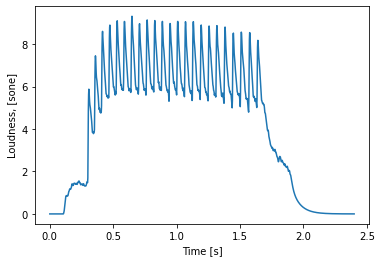

In [8]:
time = np.linspace(0,0.002*(N.size - 1),N.size)
plt.plot(time, N)
plt.xlabel("Time [s]")
plt.ylabel("Loudness, [sone]")
plt.show()